<a href="https://colab.research.google.com/github/ZenShirogan/Drug_Dection_Web/blob/main/drug_dect_before_oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary Package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot


# Importing the DataSet and Interpreting the target and inputs variable 

In [ ]:
df = pd.read_csv("/content/drugcsv.csv")
df.columns


Index(['Age', 'Gender', 'Education', 'Enjoyable with-', 'Live with',
       'Conflict with law', 'Motive about drug', 'Spend most time',
       'Failure in life', 'Mental/emotional problem', 'Suicidal thoughts',
       'Family relationship', 'Financials of family',
       'Addicted person in family', 'no. of friends', 'Withdrawal symptoms',
       'friends’ houses at night', 'Satisfied with workplace', 'Case in court',
       'Living with drug user', 'Smoking', 'Ever taken drug',
       'Friends influence', 'If chance given to taste drugs',
       'Easy to control use of drug', 'Frequency of drug usage'],
      dtype='object')

In [ ]:
df["Age"]=df["Age"].replace({'15 to 22 years':0,
                             'between 22 to 35 years':1,
                             'between 35 to 48':2,
                            'above 48':3 })
df["Gender"]=df["Gender"].replace({'Male':1,'Female':0})

df["Education"]=df["Education"].replace({'Postgraduate (MSc/PhD)':4,
                                         'H.S.C / A levels':2,
                                         'Undergraduate':3,
                                         'Primary Education':0,
                                         'S.S.C /O levels':1})
df["Enjoyable with-"]=df["Enjoyable with-"].replace({'Multiple drugs':2,'I have no idea':0,'One drug':1})
df["Live with"]=df["Live with"].replace({'Hostel/Hall':2,'With Family/Relatives':1})
df["Conflict with law"]=df["Conflict with law"].replace({'Yes':1,'No':0})
df["Motive about drug"]=df["Motive about drug"].replace({'Disease':0,
                                                         'Disease, Should avoid':1,
                                                         'Disease, Social trend':2,
                                                         'Disease, Social trend, Should avoid':3,
                                                         'Social trend':5,
                                                         'Should avoid':4,
                                                         'Social trend, Should avoid':6})
df["Spend most time"]=df["Spend most time"].replace({'Friends':2,'Alone':0,'Family/ Relatives':1})
df["Failure in life"]=df["Failure in life"].replace({'No':0,'Yes':1})
df["Mental/emotional problem"]=df["Mental/emotional problem"].replace({'None':0,
                                                                       'Anger':1,
                                                                       'Anger, Others':2,
                                                                       'Depression/ inferiority/Guilt':3,
                                                                       'Depression/ inferiority/Guilt, Anger':4,
                                                                       'Depression/ inferiority/Guilt, Anger, Others':5,
                                                                       'Depression/ inferiority/Guilt, Others':6,
                                                                       'Depression/ inferiority/Guilt, Tension/Anxiety':7,
                                                                       'Depression/ inferiority/Guilt, Tension/Anxiety, Anger':8,
                                                                       'Depression/ inferiority/Guilt, Tension/Anxiety, Anger, Others':9,
                                                                       'Depression/ inferiority/Guilt, Tension/Anxiety, Anger, Others, None':10,
                                                                       'Depression/ inferiority/Guilt, Tension/Anxiety, Others':11,
                                                                       'Tension/Anxiety':12,
                                                                       'Tension/Anxiety, Anger':13,
                                                                       'Tension/Anxiety, Anger, Others':14,
                                                                       'Tension/Anxiety, Others':15,
                                                                       'Others':16})
df["Suicidal thoughts"]=df["Suicidal thoughts"].replace({'No':0,'Yes':1})
df["Family relationship"]=df["Family relationship"].replace({'Satisfactory':2,'Communcaiton gap':0,'Average':1})
df["Financials of family"]=df["Financials of family"].replace({'Solvent':2,'Rich / Strong':2,'Poor / weak':0,'Medium':1})
df["Addicted person in family"]=df["Addicted person in family"].replace({'Yes':2,'No':0,'Not sure':1})
df["no. of friends"]=df["no. of friends"].replace({'Many (more than 5)':2,'None':0,'Few (1-4)':1})
df["Withdrawal symptoms"]=df["Withdrawal symptoms"].replace({'Yes':2,'No':0,'I have no idea':1})
df["friends’ houses at night"]=df["friends’ houses at night"].replace({'Yes, often I do.':2,"No, I don't":0,'Sometimes':1})
df["Satisfied with workplace"]=df["Satisfied with workplace"].replace({'No':0,'Yes':1})
df["Case in court"]=df["Case in court"].replace({'No':0,'Yes':1})
df["Living with drug user"]=df["Living with drug user"].replace({'Yes':2,'No':0,'Not sure':1})
df["Smoking"]=df["Smoking"].replace({"Yes, occasionally":1,"Yes, every day.":2,"No, I don't":0})
df["Ever taken drug"]=df["Ever taken drug"].replace({'Yes':1,'No':0})
df["Friends influence"]=df["Friends influence"].replace({"No, they don't":0,"Yes, often they do":1})
df["If chance given to taste drugs"]=df["If chance given to taste drugs"].replace({"I'll try":2,"i don't know/ confused":1,"no, i'll not":0})
df["Easy to control use of drug"]=df["Easy to control use of drug"].replace({"No, It's not possible":0,"Yes, It's possible":1})

In [ ]:
x=df.drop('Frequency of drug usage',axis=1)
y=df['Frequency of drug usage']


# Description about Dataset

In [ ]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [ ]:
y.value_counts()

Never/ Not applicable    110
Occasionally              46
Once/twice a week         34
Regularly                 21
Name: Frequency of drug usage, dtype: int64

# Importing the necessary package for ML

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state= 42,solver='liblinear')
logreg.fit(x_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

Training Data Set









In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_1=logreg.predict(x_train)
log_c_n_train=confusion_matrix(y_train, y_pred_1)
log_c_r_train=classification_report(y_train, y_pred_1)
print(log_c_n_train)
print(log_c_r_train)

[[74  2  0  0]
 [ 5 24  3  2]
 [ 0  8 15  0]
 [ 1  1  2 10]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.93      0.97      0.95        76
         Occasionally       0.69      0.71      0.70        34
    Once/twice a week       0.75      0.65      0.70        23
            Regularly       0.83      0.71      0.77        14

             accuracy                           0.84       147
            macro avg       0.80      0.76      0.78       147
         weighted avg       0.83      0.84      0.83       147



Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred1=logreg.predict(x_test)
log_c_n_test=confusion_matrix(y_test, y_pred1)
log_c_r_test=classification_report(y_test, y_pred1)
print(log_c_n_test)
print(log_c_r_test)

[[30  2  1  1]
 [ 5  5  1  1]
 [ 1  6  4  0]
 [ 0  4  0  3]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.83      0.88      0.86        34
         Occasionally       0.29      0.42      0.34        12
    Once/twice a week       0.67      0.36      0.47        11
            Regularly       0.60      0.43      0.50         7

             accuracy                           0.66        64
            macro avg       0.60      0.52      0.54        64
         weighted avg       0.68      0.66      0.66        64



Probablity in logistic regression

#KNN Algorithm

DataSet

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_2=knn.predict(x_train)
knn_c_n_train=confusion_matrix(y_train, y_pred_2)
knn_c_r_train=classification_report(y_train, y_pred_2)
print(knn_c_n_train)
print(knn_c_r_train)

[[83  0  0  0]
 [12 24  4  1]
 [ 6 10 12  0]
 [ 5  4  5  2]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.78      1.00      0.88        83
         Occasionally       0.63      0.59      0.61        41
    Once/twice a week       0.57      0.43      0.49        28
            Regularly       0.67      0.12      0.21        16

             accuracy                           0.72       168
            macro avg       0.66      0.53      0.55       168
         weighted avg       0.70      0.72      0.68       168



Test Dataset

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred2=knn.predict(x_test)
knn_c_n_test=confusion_matrix(y_test, y_pred2)
knn_c_r_test=classification_report(y_test, y_pred2)
print(knn_c_n_test)
print(knn_c_r_test)

[[25  2  0  0]
 [ 3  2  0  0]
 [ 3  2  1  0]
 [ 2  2  0  1]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.76      0.93      0.83        27
         Occasionally       0.25      0.40      0.31         5
    Once/twice a week       1.00      0.17      0.29         6
            Regularly       1.00      0.20      0.33         5

             accuracy                           0.67        43
            macro avg       0.75      0.42      0.44        43
         weighted avg       0.76      0.67      0.64        43



Probability 

#Random Forest 

In [ ]:
random_forest = RandomForestClassifier(random_state=0,min_samples_leaf=10,
                                       n_estimators=100)
random_forest.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=0)

Training DataSet 

In [ ]:
rf_predicted_train = random_forest.predict(x_train)
rf_c_n_train=confusion_matrix(y_train,rf_predicted_train)
rf_c_r_train=classification_report(y_train,rf_predicted_train)
print(rf_c_n_train)
print(rf_c_r_train)

[[79  4  0  0]
 [ 7 34  0  0]
 [ 2 16 10  0]
 [ 4 10  2  0]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.86      0.95      0.90        83
         Occasionally       0.53      0.83      0.65        41
    Once/twice a week       0.83      0.36      0.50        28
            Regularly       0.00      0.00      0.00        16

             accuracy                           0.73       168
            macro avg       0.56      0.53      0.51       168
         weighted avg       0.69      0.73      0.69       168



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Dataset

In [ ]:
rf_predicted = random_forest.predict(x_test)
rf_c_n_test=confusion_matrix(y_test,rf_predicted)
rf_c_r_test=classification_report(y_test,rf_predicted)
print(knn_c_n_test)
print(knn_c_r_test)

[[25  2  0  0]
 [ 3  2  0  0]
 [ 3  2  1  0]
 [ 2  2  0  1]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.76      0.93      0.83        27
         Occasionally       0.25      0.40      0.31         5
    Once/twice a week       1.00      0.17      0.29         6
            Regularly       1.00      0.20      0.33         5

             accuracy                           0.67        43
            macro avg       0.75      0.42      0.44        43
         weighted avg       0.76      0.67      0.64        43



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Decision Tree Classifiier

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

Training Dataset

In [ ]:
y_pred_dec_1 = classifier.predict(x_train)
ds_c_n_train=confusion_matrix(y_train,y_pred_dec_1)
ds_c_r_train=classification_report(y_train,y_pred_dec_1)
print(ds_c_n_train)
print(ds_c_r_train)

[[83  0  0  0]
 [ 0 41  0  0]
 [ 0  0 28  0]
 [ 0  0  0 16]]
                       precision    recall  f1-score   support

Never/ Not applicable       1.00      1.00      1.00        83
         Occasionally       1.00      1.00      1.00        41
    Once/twice a week       1.00      1.00      1.00        28
            Regularly       1.00      1.00      1.00        16

             accuracy                           1.00       168
            macro avg       1.00      1.00      1.00       168
         weighted avg       1.00      1.00      1.00       168



Test Dataset

In [ ]:
y_pred_dec = classifier.predict(x_test)
ds_c_n_test=confusion_matrix(y_test,y_pred_dec)
ds_c_r_test=classification_report(y_test,y_pred_dec)
print(ds_c_n_test)
print(ds_c_r_test)

[[22  4  0  1]
 [ 1  1  3  0]
 [ 1  2  1  2]
 [ 1  3  1  0]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.88      0.81      0.85        27
         Occasionally       0.10      0.20      0.13         5
    Once/twice a week       0.20      0.17      0.18         6
            Regularly       0.00      0.00      0.00         5

             accuracy                           0.56        43
            macro avg       0.29      0.30      0.29        43
         weighted avg       0.59      0.56      0.57        43



#Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

Training Dataset

In [ ]:
y_pred_train_2 = nb.predict(x_train)
from sklearn.metrics import classification_report, confusion_matrix
gy_c_n_train=confusion_matrix(y_train, y_pred_train_2)
gy_c_r_train=classification_report(y_train, y_pred_train_2)
print(gy_c_n_train)
print(gy_c_r_train)

[[73  0  3  0]
 [ 0  3 30  1]
 [ 0  0 23  0]
 [ 0  1  6  7]]
                       precision    recall  f1-score   support

Never/ Not applicable       1.00      0.96      0.98        76
         Occasionally       0.75      0.09      0.16        34
    Once/twice a week       0.37      1.00      0.54        23
            Regularly       0.88      0.50      0.64        14

             accuracy                           0.72       147
            macro avg       0.75      0.64      0.58       147
         weighted avg       0.83      0.72      0.69       147



Test Dataset

In [ ]:
y_pred_2 = nb.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
gy_c_n_test=confusion_matrix(y_test, y_pred_2)
gy_c_r_test=classification_report(y_test, y_pred_2)
print(gy_c_n_test)
print(gy_c_r_test)

[[29  1  3  1]
 [ 2  0 10  0]
 [ 1  1  8  1]
 [ 0  0  6  1]]
                       precision    recall  f1-score   support

Never/ Not applicable       0.91      0.85      0.88        34
         Occasionally       0.00      0.00      0.00        12
    Once/twice a week       0.30      0.73      0.42        11
            Regularly       0.33      0.14      0.20         7

             accuracy                           0.59        64
            macro avg       0.38      0.43      0.37        64
         weighted avg       0.57      0.59      0.56        64



#Pictorail Representation of Confussion Matrix

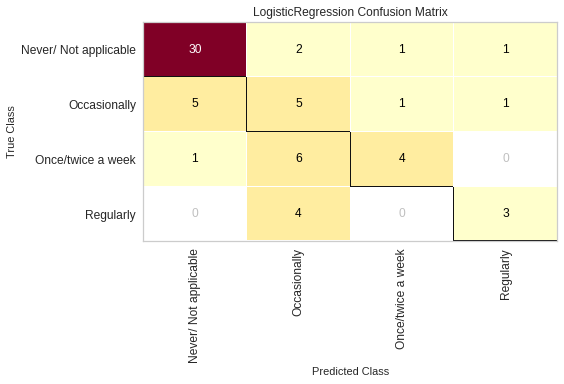

In [ ]:
visualizer = ConfusionMatrix(LogisticRegression(random_state=42, solver='liblinear'))
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

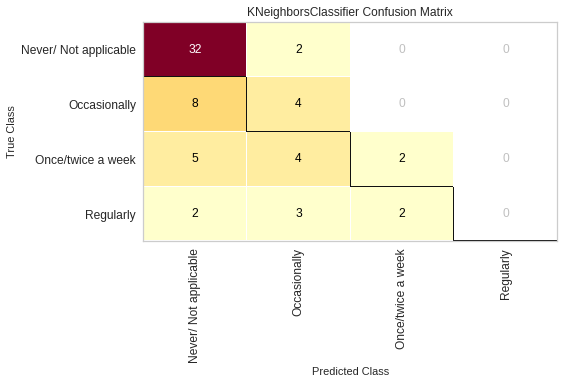

In [ ]:
visualizer = ConfusionMatrix(KNeighborsClassifier() )
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

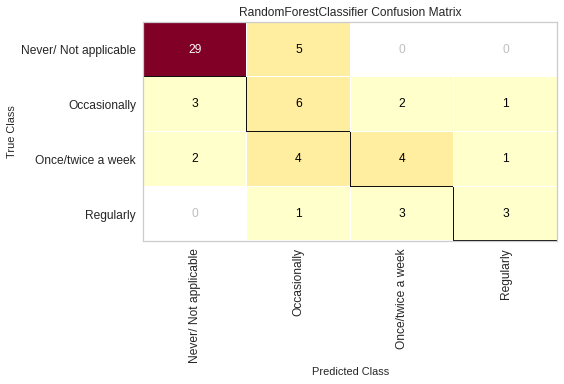

In [ ]:
visualizer = ConfusionMatrix(RandomForestClassifier(random_state=1) )
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

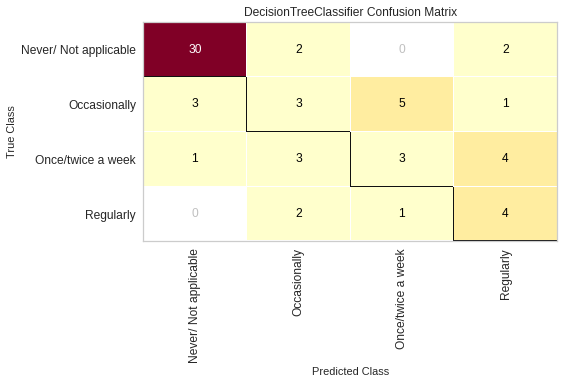

In [ ]:
visualizer = ConfusionMatrix(DecisionTreeClassifier() )
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

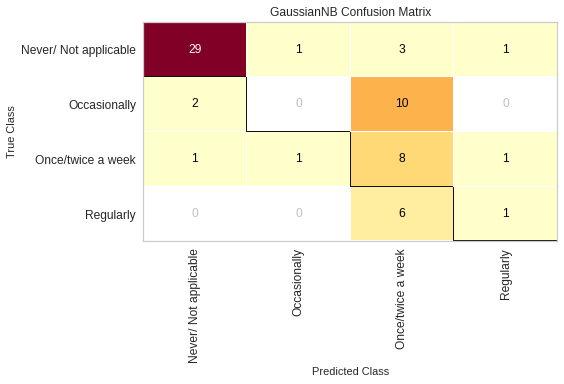

In [ ]:
visualizer = ConfusionMatrix(GaussianNB())
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

#Pictorail Representation of Percentage Confussion Matrix

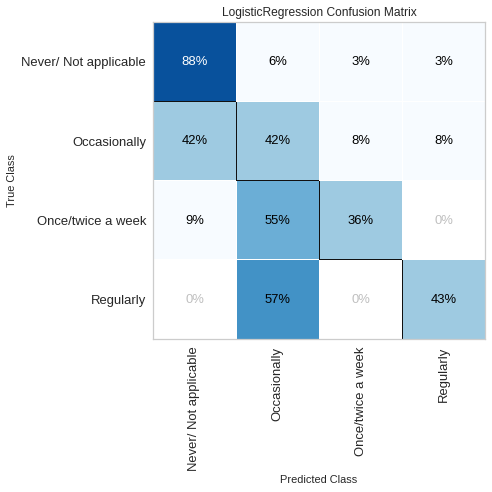

In [ ]:
from yellowbrick.classifier.confusion_matrix import confusion_matrix

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

confusion_matrix(LogisticRegression(random_state=42, solver='liblinear'),
                                          x_train, y_train,
                                          x_test, y_test,
                                          percent=True,
                                          fontsize=13,
                                          ax=ax,
                                          cmap="Blues");

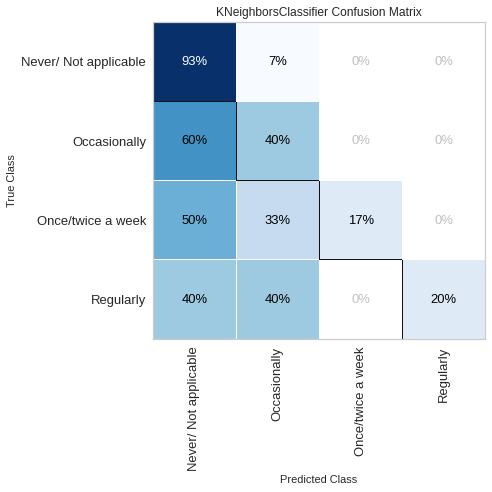

In [ ]:
from yellowbrick.classifier.confusion_matrix import confusion_matrix

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

confusion_matrix(KNeighborsClassifier(),
                                          x_train, y_train,
                                          x_test, y_test,
                                          percent=True,
                                          fontsize=13,
                                          ax=ax,
                                          cmap="Blues");

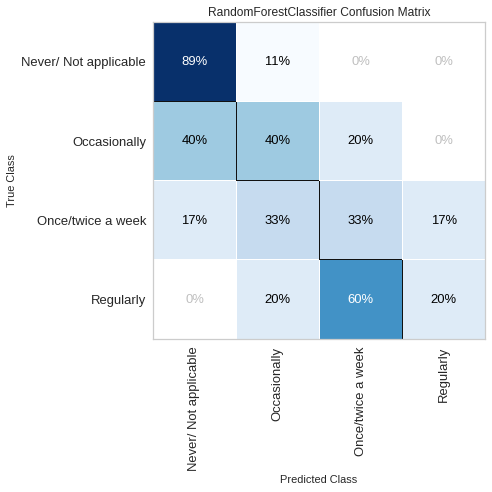

In [ ]:

from yellowbrick.classifier.confusion_matrix import confusion_matrix

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

confusion_matrix(RandomForestClassifier(random_state=1),
                                          x_train, y_train,
                                          x_test, y_test,
                                          percent=True,
                                          fontsize=13,
                                          ax=ax,
                                          cmap="Blues");

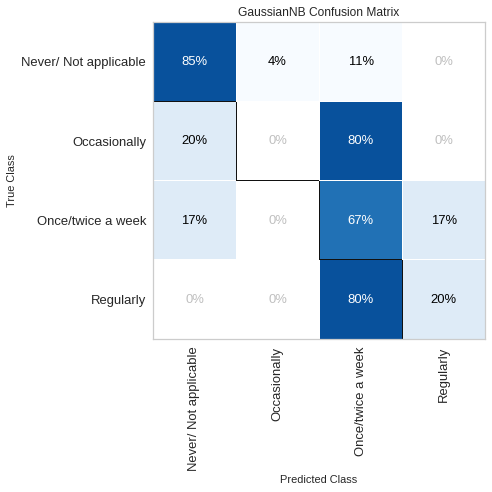

In [ ]:
from yellowbrick.classifier.confusion_matrix import confusion_matrix

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

confusion_matrix(GaussianNB(),
                                          x_train, y_train,
                                          x_test, y_test,
                                          percent=True,
                                          fontsize=13,
                                          ax=ax,
                                          cmap="Blues");

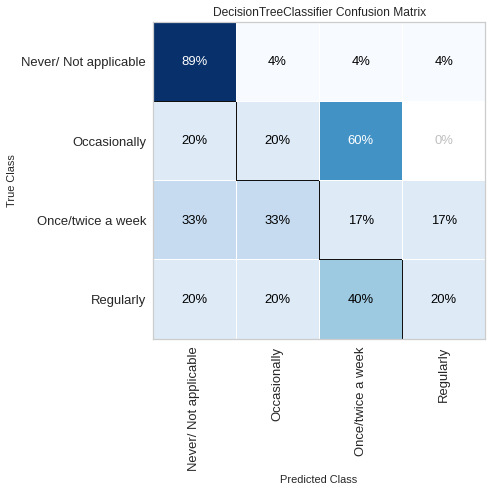

In [ ]:
from yellowbrick.classifier.confusion_matrix import confusion_matrix

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

confusion_matrix(DecisionTreeClassifier() ,
                                          x_train, y_train,
                                          x_test, y_test,
                                          percent=True,
                                          fontsize=13,
                                          ax=ax,
                                          cmap="Blues");

#Pictorail Representation of ROC

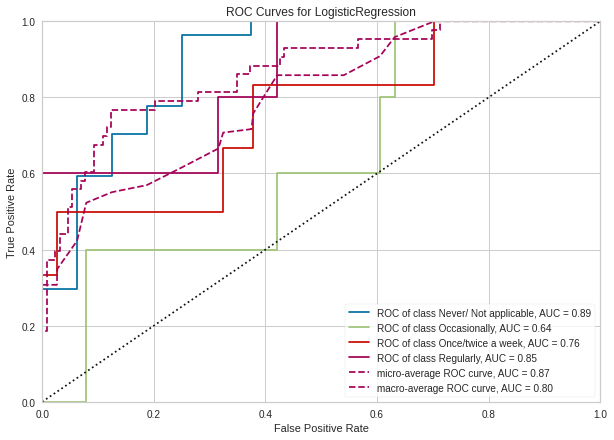

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc, roc_curve

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

roc_auc(LogisticRegression(random_state=42, solver='liblinear'),
        x_train, y_train,
        x_test, y_test,
        ax=ax1
        );

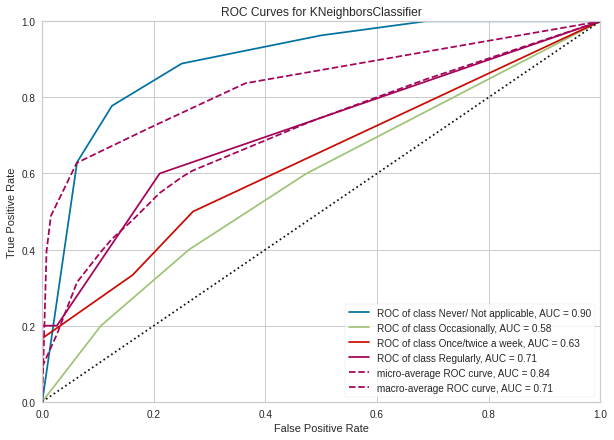

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc, roc_curve

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

roc_auc(KNeighborsClassifier(),
        x_train, y_train,
        x_test, y_test,
        ax=ax1
        );

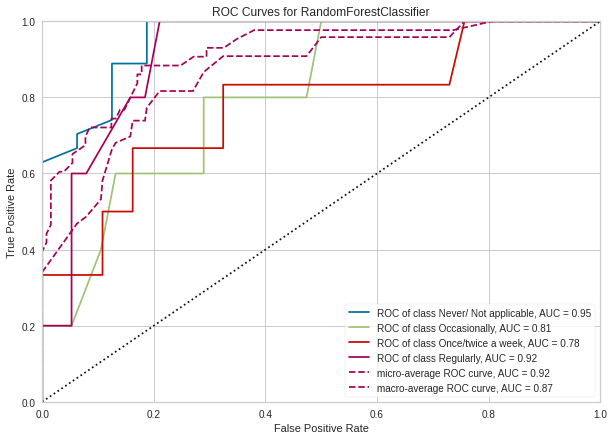

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc, roc_curve

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

roc_auc(RandomForestClassifier(random_state=1),
        x_train, y_train,
        x_test, y_test,
        ax=ax1
        );

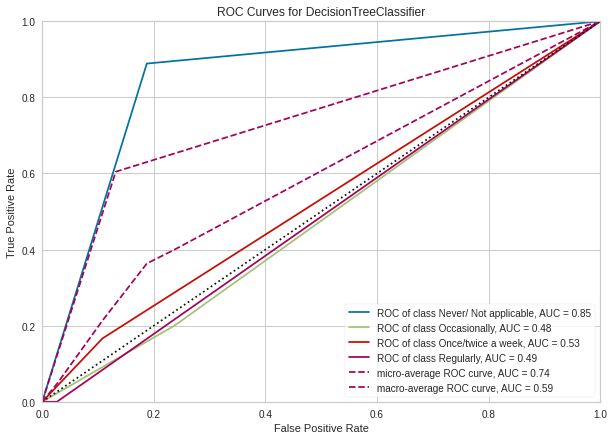

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc, roc_curve

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

roc_auc(DecisionTreeClassifier(),
        x_train, y_train,
        x_test, y_test,
        ax=ax1
        );

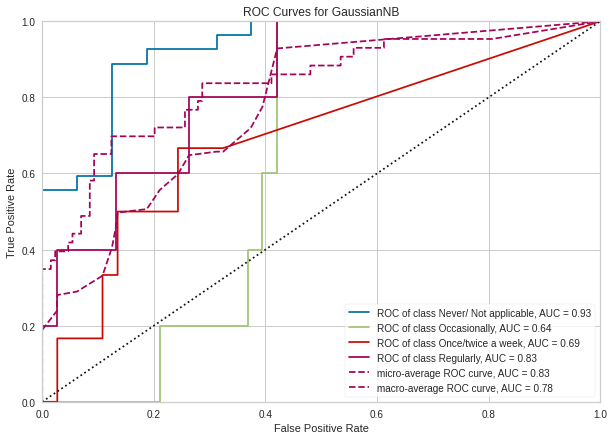

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc, roc_curve

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

roc_auc(GaussianNB(),
        x_train, y_train,
        x_test, y_test,
        ax=ax1
        );

#Pictorail Representation of Precision Recall

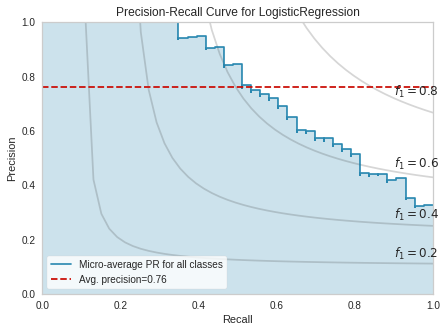

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(LogisticRegression(random_state=42, solver='liblinear'),
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

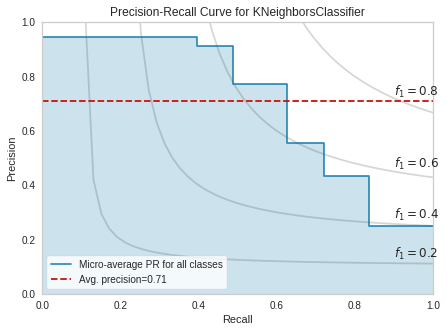

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(KNeighborsClassifier(),
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

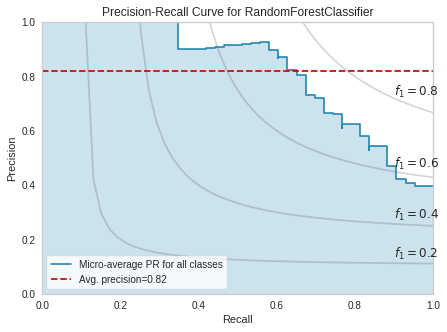

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(RandomForestClassifier(random_state=1),
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

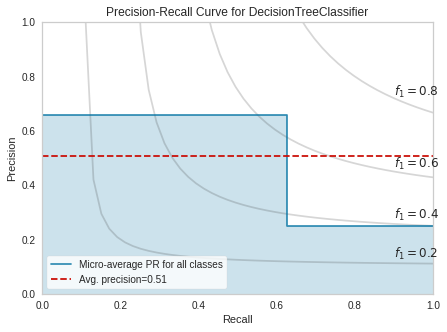

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(DecisionTreeClassifier(),
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

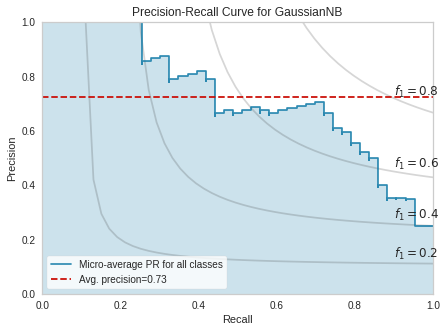

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(GaussianNB(),
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

## Precison Recall Pictorical

/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


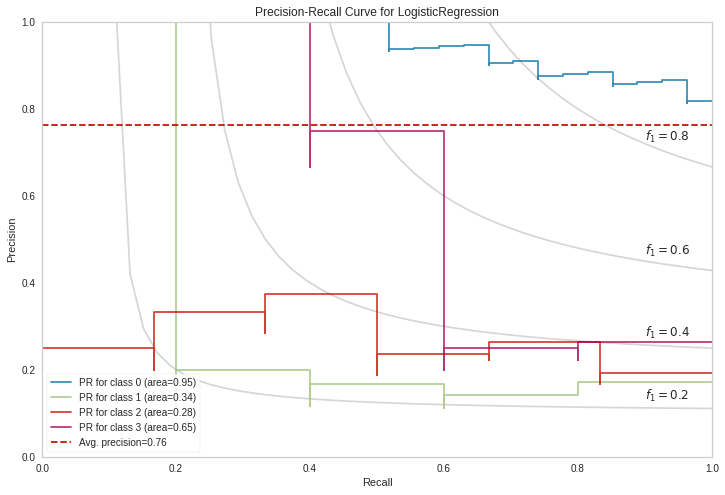

In [ ]:
from yellowbrick.classifier.prcurve import precision_recall_curve

precision_recall_curve(LogisticRegression(random_state=42, solver='liblinear'),
                       x_train, y_train,
                       x_test, y_test,
                       per_class=True,
                       fill_area=False,
                       iso_f1_curves=True,
                       fig=plt.figure(figsize=(12,8))
                       );


/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


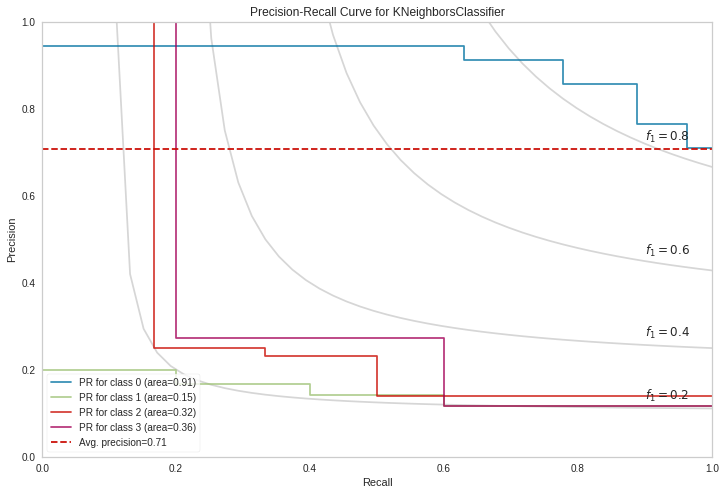

In [ ]:
from yellowbrick.classifier.prcurve import precision_recall_curve

precision_recall_curve(KNeighborsClassifier(),
                       x_train, y_train,
                       x_test, y_test,
                       per_class=True,
                       fill_area=False,
                       iso_f1_curves=True,
                       fig=plt.figure(figsize=(12,8))
                       );


/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


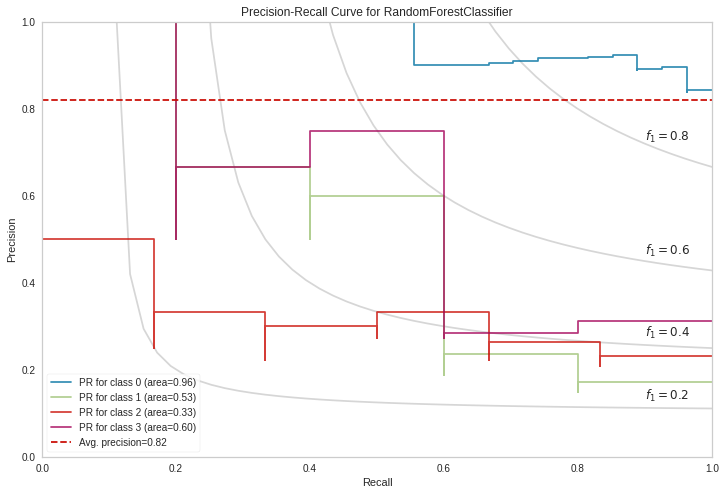

In [ ]:
from yellowbrick.classifier.prcurve import precision_recall_curve

precision_recall_curve(RandomForestClassifier(random_state=1),
                       x_train, y_train,
                       x_test, y_test,
                       per_class=True,
                       fill_area=False,
                       iso_f1_curves=True,
                       fig=plt.figure(figsize=(12,8))
                       );


/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


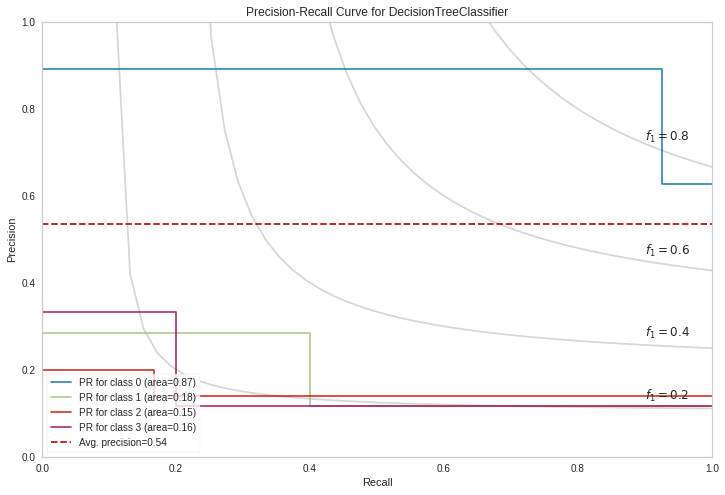

In [ ]:
from yellowbrick.classifier.prcurve import precision_recall_curve

precision_recall_curve(DecisionTreeClassifier(),
                       x_train, y_train,
                       x_test, y_test,
                       per_class=True,
                       fill_area=False,
                       iso_f1_curves=True,
                       fig=plt.figure(figsize=(12,8))
                       );


/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


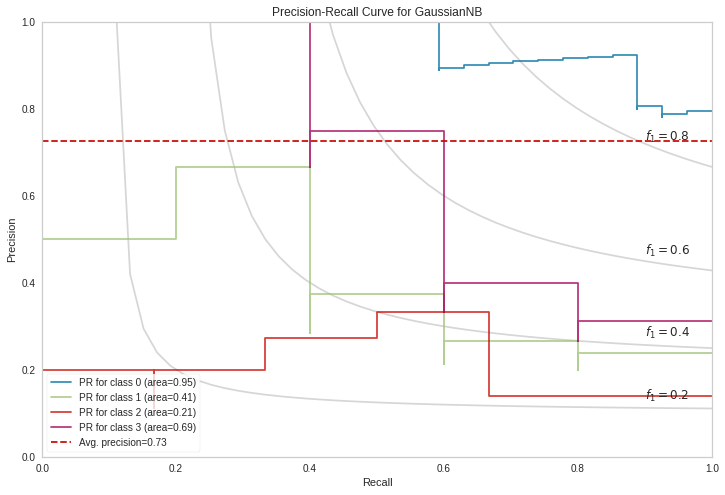

In [ ]:
from yellowbrick.classifier.prcurve import precision_recall_curve

precision_recall_curve(GaussianNB(),
                       x_train, y_train,
                       x_test, y_test,
                       per_class=True,
                       fill_area=False,
                       iso_f1_curves=True,
                       fig=plt.figure(figsize=(12,8))
                       );


#Pictorail Representation of Class Prediction

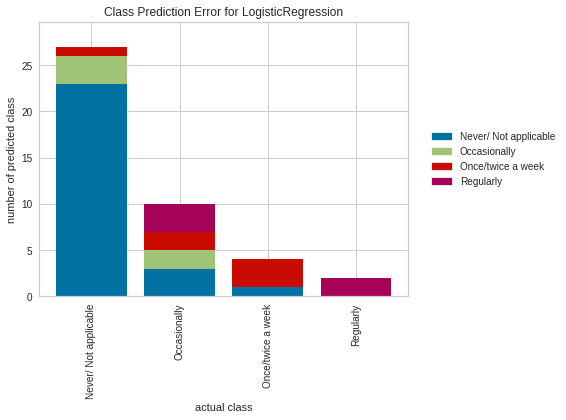

In [ ]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(LogisticRegression(random_state=42, solver='liblinear'),
                        
                           fig=plt.figure(figsize=(9,6)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

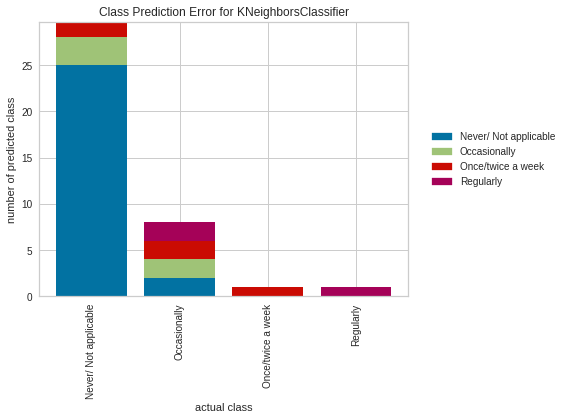

In [ ]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(KNeighborsClassifier(),
                        
                           fig=plt.figure(figsize=(9,6)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

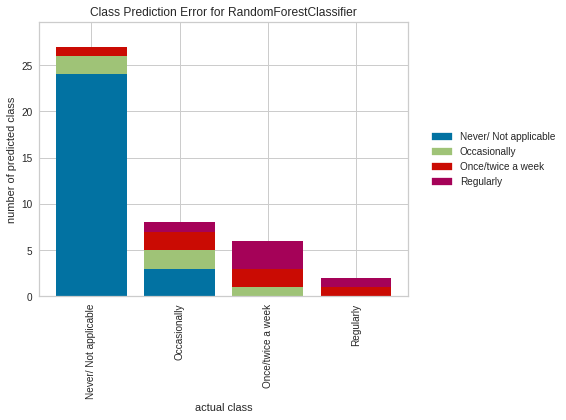

In [ ]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(RandomForestClassifier(random_state=1),
                        
                           fig=plt.figure(figsize=(9,6)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

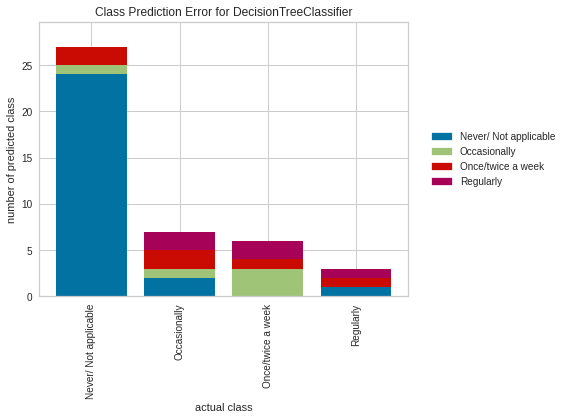

In [ ]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(DecisionTreeClassifier(),
                        
                           fig=plt.figure(figsize=(9,6)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();

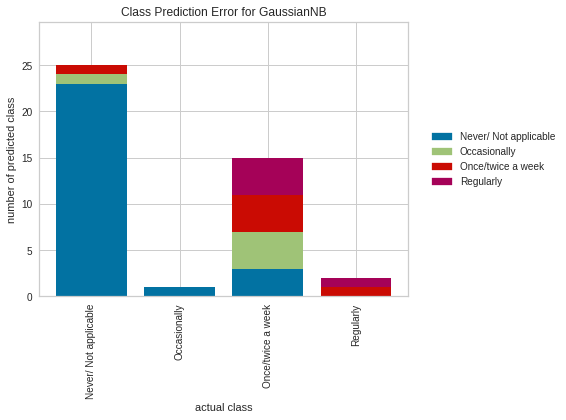

In [ ]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(GaussianNB(),
                        
                           fig=plt.figure(figsize=(9,6)))

viz.fit(x_train, y_train)

viz.score(x_test, y_test)

viz.show();